In [1]:
SENSOR_X = .00368 #m
SENSOR_Y = .00276 #m
FOCAL_LENGTH = .00304 #m
HFOV = 62.2 #degrees
VFOV = 48.8 #degrees
blue_dot_x = 1750
blue_dot_y = 950
red_dot_x = 2870
red_dot_y = 1050

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2

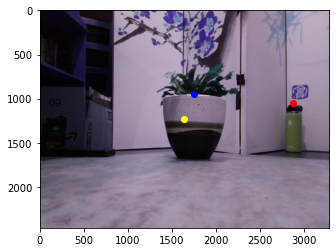

In [14]:
img = cv2.imread("cactus.jpg")
plt.imshow(img)
plt.scatter([blue_dot_x], [blue_dot_y], color="blue")
plt.scatter([red_dot_x], [red_dot_y], color="red")
plt.scatter([img.shape[1]/2], [img.shape[0]/2], color="yellow")
plt.show()

In [4]:
#converts from pixel position on a camera sensor to meters
#also shifts the origin of the camera coordinate system to the center of the sensor
def sensor_position(pix_x: int, pix_y: int, res_x:float , res_y: float) -> 'tuple[float, float]':
    sensor_pos_x = (pix_x/res_x)*SENSOR_X
    sensor_pos_y = (pix_y/res_y)*SENSOR_Y
    #adjust to center at middle
    sensor_pos_x -= SENSOR_X/2
    sensor_pos_y -= SENSOR_Y/2
    return sensor_pos_x,sensor_pos_y


In [5]:
blue_dot_position = sensor_position(blue_dot_x, blue_dot_y, img.shape[1], img.shape[0])
red_dot_position = sensor_position(red_dot_x, red_dot_y, img.shape[1], img.shape[0])
print("Blue dot position:", blue_dot_position)
print("Red dot position:", red_dot_position)

Blue dot position: (0.00012341463414634142, -0.0003158766233766234)
Red dot position: (0.0013800000000000002, -0.00020386363636363636)


In [6]:
#returns a tuple with the vertical and horizontal angles to a point in an image
#relative to the CCSO
#pos_x and pos_y are in meters
def get_angle_ccso(pos_x: int, pos_y: int, focal_length=FOCAL_LENGTH) -> 'tuple[float, float]':
    x_angle = np.arctan2(pos_x,focal_length)
    y_angle = np.arctan2(pos_y,focal_length)
    return x_angle, y_angle

In [7]:
blue_x, blue_y = blue_dot_position
red_x, red_y = red_dot_position
blue_dot_angle = get_angle_ccso(blue_x, blue_y)
red_dot_angle = get_angle_ccso(red_x, red_y)
print("Blue dot angle:", np.rad2deg(blue_dot_angle))
print("Red dot angle:", np.rad2deg(red_dot_angle))

Blue dot angle: [ 2.32475554 -5.93213231]
Red dot angle: [24.41554835 -3.83653407]


In [9]:
18 - np.tan(np.deg2rad(5.932))*62

11.5579241156649

In [8]:
actual_angle = np.degrees(np.arctan2(51, 62 + 49))
print("The actual angle is: ", np.round(actual_angle, 2), "degrees" )
print("The difference between the actual and estimated angle is", np.round(actual_angle-np.rad2deg(red_dot_angle[0]), 3), "degrees")

The actual angle is:  24.68 degrees
The difference between the actual and estimated angle is 0.261 degrees
